In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
!pip install pygal_maps_world
from pygal_maps_world.maps import World
import pygal
!pip install geopandas
import geopandas as gpd


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.8/270.8 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 7.7 MB/s eta 0:00:00
  Created wheel for pygal_maps_world: filename=pygal_maps_world-1.0.2-py3-none-any.whl size=278561 sha256=600afe92b86e0f937b65aa8f5d1c703464d2de14a19d5400431fd52b840119d0
  Stored in directory: /root/.cache/pip/wheels/54/e6/11/5be0d3206bdc0ea8f0fcf1fe32661d7e614863c8b6a22655ae
Successfully built pygal_maps_world


/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
df=pd.read_csv('../input/crime-in-india/crime/crime/34_Use_of_fire_arms_in_murder_cases.csv')
df.head()

,Area_Name,Year,Victims_of_Murder_by_Fire_arms,Victims_of_Murder_by_Licensed_arms,Victims_of_Murder_by_Un_licensedImprovisedCrudeCountry_made_Arms_Etc
0,Uttar Pradesh,2004,4969,437.0,4532.0
1,Uttar Pradesh,2002,4098,403.0,3695.0
2,Uttar Pradesh,2006,2565,330.0,2235.0
3,Uttar Pradesh,2003,3855,317.0,3538.0
4,Uttar Pradesh,2008,1470,261.0,1209.0


*This is the original dataset provided for analysis .*

In [3]:
df=df.rename(columns={"Victims_of_Murder_by_Fire_arms": "Total Victims_of_Murder_by_Fire_arms", "Victims_of_Murder_by_Un_licensedImprovisedCrudeCountry_made_Arms_Etc": "Victims_of_Murder_by_country_made_un-lienced_arm"})

*Here, we will rename the columns of dataset for futher better understanding.*

In [4]:
df.head()

,Area_Name,Year,Total Victims_of_Murder_by_Fire_arms,Victims_of_Murder_by_Licensed_arms,Victims_of_Murder_by_country_made_un-lienced_arm
0,Uttar Pradesh,2004,4969,437.0,4532.0
1,Uttar Pradesh,2002,4098,403.0,3695.0
2,Uttar Pradesh,2006,2565,330.0,2235.0
3,Uttar Pradesh,2003,3855,317.0,3538.0
4,Uttar Pradesh,2008,1470,261.0,1209.0


In [5]:

df['% Total Murder']=df['Total Victims_of_Murder_by_Fire_arms']/df['Total Victims_of_Murder_by_Fire_arms'].sum()*(100)

In [6]:
df['% Total Murder Licenced arm']=df['Victims_of_Murder_by_Licensed_arms']/df['Victims_of_Murder_by_Licensed_arms'].sum()*(100)

In [7]:
df['% Total Murder Un-Lienced arm']=df['Victims_of_Murder_by_country_made_un-lienced_arm']/df['Victims_of_Murder_by_country_made_un-lienced_arm'].sum()*(100)

*In the above three codes we have added 3 new columns where percentage of murder is observed through analysizing the data. *

In [8]:
df.shape

(284, 8)

*Therefore , the updataed dataset is now having **284 Rows and 8 Columns**.*

In [9]:
df['Year'].min()

2001

In [10]:
df['Year'].max()

2010

*The year column in the dataset is having* **min year 2001 and max year 2010** *for analysis of murder in India using firearms. *

In [11]:
df.isnull().sum()

Area_Name                                            0
Year                                                 0
Total Victims_of_Murder_by_Fire_arms                 0
Victims_of_Murder_by_Licensed_arms                  15
Victims_of_Murder_by_country_made_un-lienced_arm     4
% Total Murder                                       0
% Total Murder Licenced arm                         15
% Total Murder Un-Lienced arm                        4
dtype: int64

*This data also contain a total 19 null values ,* ofwhich **15 are in 'Victims_of_Murder_by_Licensed_arms**'  col^m and **4 in 'Victims_of_Murder_by_Un_licensedImprovisedCrudeCountry_made_Arms_Etc'**

In [12]:
df.notnull().sum().sum()

2234

*This data contains a total of* **1401 NOTNULL values.**

In [13]:
df.describe()

,Year,Total Victims_of_Murder_by_Fire_arms,Victims_of_Murder_by_Licensed_arms,Victims_of_Murder_by_country_made_un-lienced_arm,% Total Murder,% Total Murder Licenced arm,% Total Murder Un-Lienced arm
count,284.000000,284.000000,269.000000,280.000000,284.000000,269.000000,280.000000
mean,2005.492958,210.866197,21.899628,192.835714,0.352113,0.371747,0.357143
std,2.868734,560.426386,56.270677,515.905601,0.935822,0.955197,0.955487
min,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,7.000000,1.000000,4.000000,0.011689,0.016975,0.007408
50%,2005.000000,43.000000,4.000000,36.500000,0.071803,0.067900,0.067600
75%,2008.000000,151.000000,13.000000,135.000000,0.252146,0.220676,0.250028
max,2010.000000,4969.000000,437.000000,4532.000000,8.297432,7.418095,8.393525


the following above  codecell gives information regarding** **mean. std deviation, min and max values and other usefull data usefull for analysis of data.****

In [14]:
df.dtypes

Area_Name                                            object
Year                                                  int64
Total Victims_of_Murder_by_Fire_arms                  int64
Victims_of_Murder_by_Licensed_arms                  float64
Victims_of_Murder_by_country_made_un-lienced_arm    float64
% Total Murder                                      float64
% Total Murder Licenced arm                         float64
% Total Murder Un-Lienced arm                       float64
dtype: object

*The following results of codecell gives the information regarding the type of data type, of every colm^s in dataset. it gives the nature  of data in this original format in integer or float. These can also be coverted from one type of data to other, using ASTYPE()Build in Function.*

In [15]:
df.count()

Area_Name                                           284
Year                                                284
Total Victims_of_Murder_by_Fire_arms                284
Victims_of_Murder_by_Licensed_arms                  269
Victims_of_Murder_by_country_made_un-lienced_arm    280
% Total Murder                                      284
% Total Murder Licenced arm                         269
% Total Murder Un-Lienced arm                       280
dtype: int64

*this gives the total values present in particular col^m  excluding null values*.

In [16]:
df['Victims_of_Murder_by_Licensed_arms'].fillna(21.89962,inplace=True)

In [17]:
df['Victims_of_Murder_by_country_made_un-lienced_arm'].fillna(192.835714,inplace=True)

*In the above 2 codes we have filled the null  values using the mean value from describe() fpr that particular null value columns.*

In [18]:
df['Victims_of_Murder_by_country_made_un-lienced_arm'].unique()

array([4.53200000e+03, 3.69500000e+03, 2.23500000e+03, 3.53800000e+03,
       1.20900000e+03, 1.88700000e+03, 1.61600000e+03, 2.16200000e+03,
       7.45000000e+02, 3.41000000e+02, 7.78000000e+02, 9.51000000e+02,
       8.70000000e+01, 1.38000000e+02, 1.23000000e+02, 9.00000000e+00,
       1.92835714e+02, 1.57000000e+02, 1.76000000e+02, 2.40000000e+02,
       8.00000000e+00, 2.07000000e+02, 1.32100000e+03, 1.17000000e+02,
       4.00000000e+00, 1.35800000e+03, 1.59000000e+02, 1.60000000e+02,
       1.83000000e+02, 6.00000000e+00, 1.11000000e+02, 5.00000000e+00,
       1.05000000e+03, 1.48000000e+02, 5.60000000e+01, 1.52700000e+03,
       5.30000000e+01, 1.42000000e+02, 4.10000000e+01, 1.90000000e+02,
       5.40000000e+01, 1.28000000e+02, 9.27000000e+02, 1.66000000e+02,
       1.36300000e+03, 3.14000000e+02, 2.36000000e+02, 9.90000000e+01,
       1.18000000e+02, 1.05000000e+02, 5.64000000e+02, 1.74000000e+02,
       1.06300000e+03, 4.60000000e+01, 4.00000000e+01, 9.80000000e+01,
      

*The above code gives the unique values from that particular column , which is helpful in data.*

<AxesSubplot:xlabel='Year', ylabel='Total Victims_of_Murder_by_Fire_arms'>

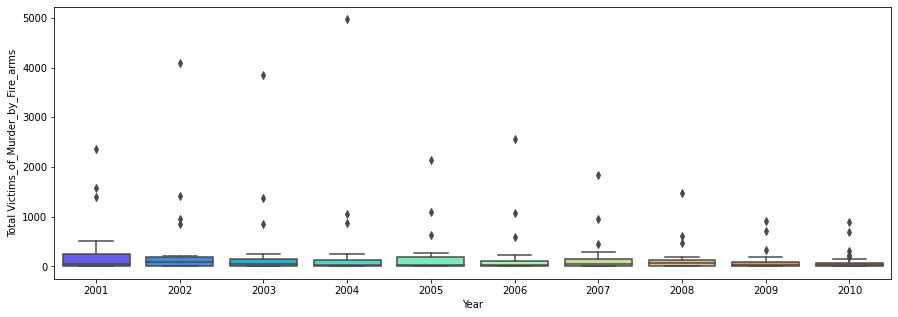

In [19]:
fig,axes=plt.subplots(figsize=(15,5))
sns.boxplot(x="Year", y="Total Victims_of_Murder_by_Fire_arms", data=df, palette='rainbow')

*The following polt is giving the outliers values for the important column , which is used futher extensively in analyzing the data. *

<AxesSubplot:xlabel='Year'>

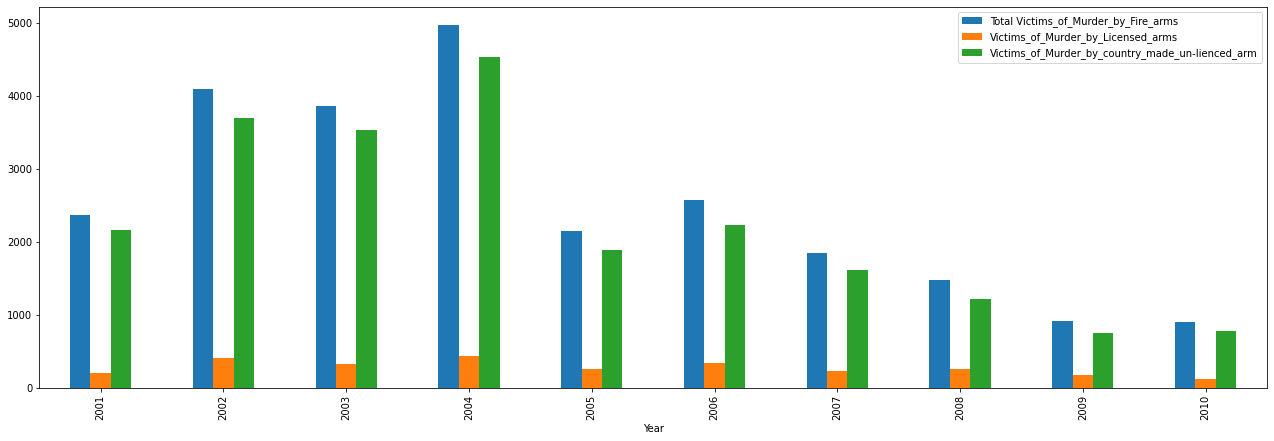

In [20]:
# plt.figure(figsize=(15,5))
df.groupby("Year")[['Total Victims_of_Murder_by_Fire_arms','Victims_of_Murder_by_Licensed_arms','Victims_of_Murder_by_country_made_un-lienced_arm']].max().plot(kind='bar',figsize=(22,7))


1.  The following Bar plot gives the overall distribution of crimes over the years from 2001 to 2010.please refer legend for notations* *italicized text*. 

2. Here, the year* **2004 had the highest number of crime followed by 2003.**

3. **2009 Being the lowest number in crime**.

<AxesSubplot:ylabel='Density'>

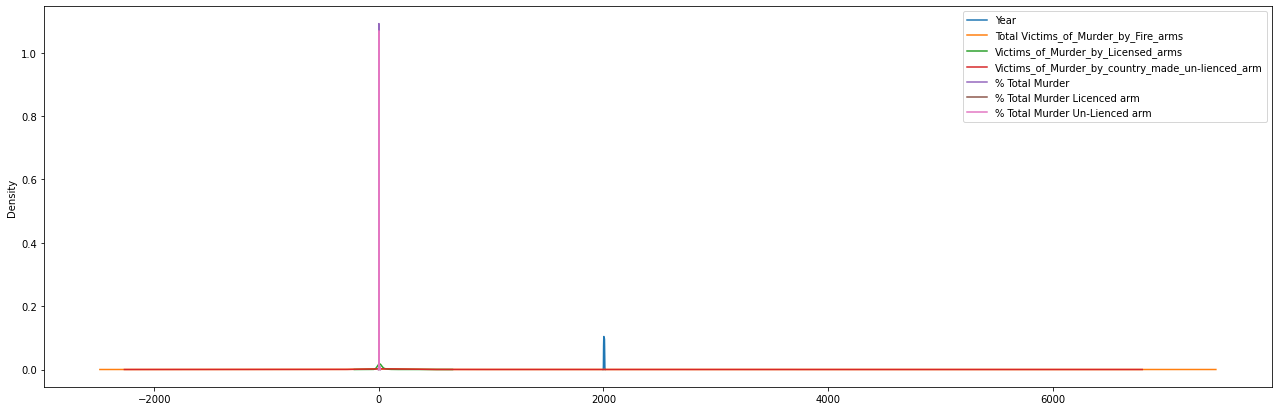

In [21]:
df.plot(kind='kde', figsize=(22,7))

*The following plot shows the frequency of crimes over that decade, where muders by un-Lienced arm has the highest frequency.*

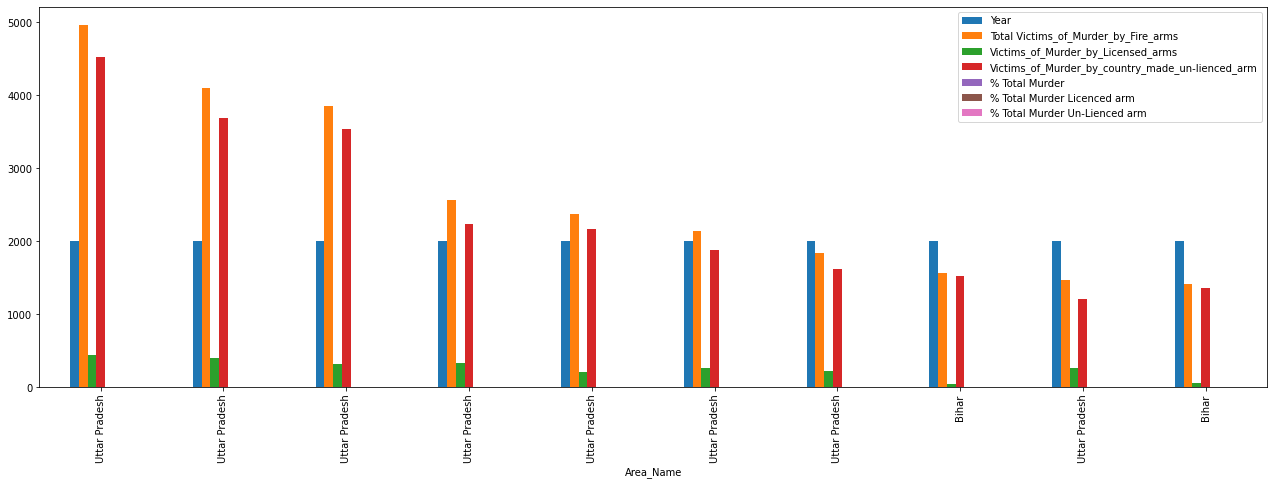

In [22]:
a=df.nlargest(10,['Total Victims_of_Murder_by_Fire_arms']).set_index('Area_Name').plot(kind='bar',figsize=(22,7))

*The Following bar plot gives the names of States which has the highest number of crime over the decade.*

1. Here, ***Utter Pradesh*** has the ***higest number*** of murders using gun.

2. ***Bihar*** bags the ***second position*** in using guns for murder.

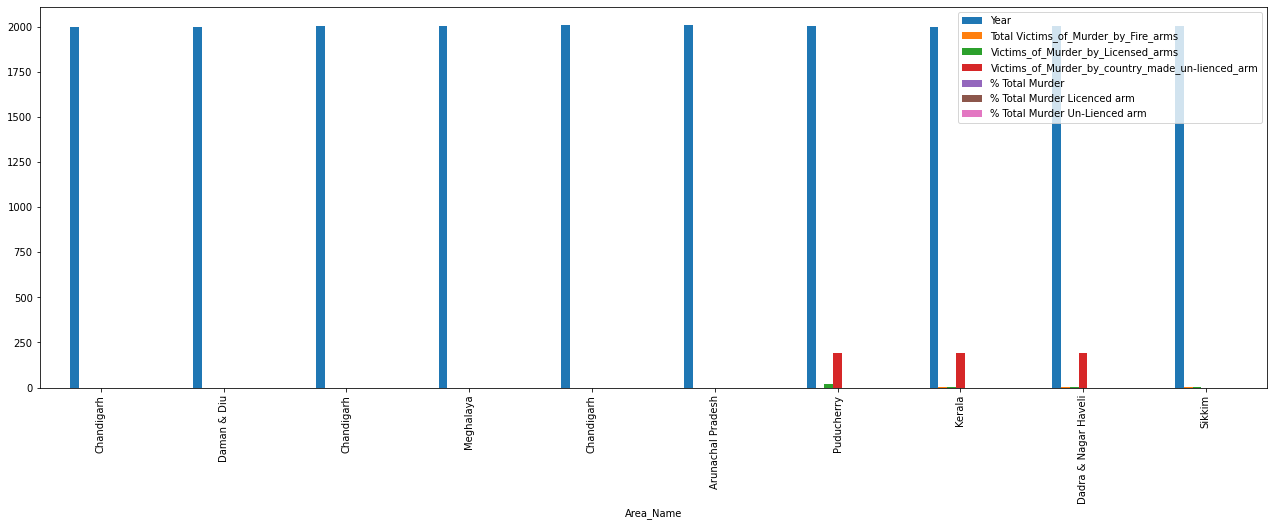

In [23]:
b=df.nsmallest(10,['Total Victims_of_Murder_by_Fire_arms']).set_index('Area_Name').plot(kind='bar',figsize=(22,7))

*The Following bar plot gives the names of States which has the Lowest number of crime over the decade.*

1. Here,*** Chandigarh , Daman & Diu , Meghalaya , Arunachal pradesh*** has lowest murder or no murder using guns in decade 2001 to 2010.

2. while, ***PuduCherry , kerala , dadra & nagar haveli ***have showed sudden rise in crimes from year 2007 to 2009.


In [24]:
x=df.nlargest(10,['Total Victims_of_Murder_by_Fire_arms'])

In [25]:
y=df.nsmallest(10,['Total Victims_of_Murder_by_Fire_arms'])


<AxesSubplot:xlabel='Area_Name'>

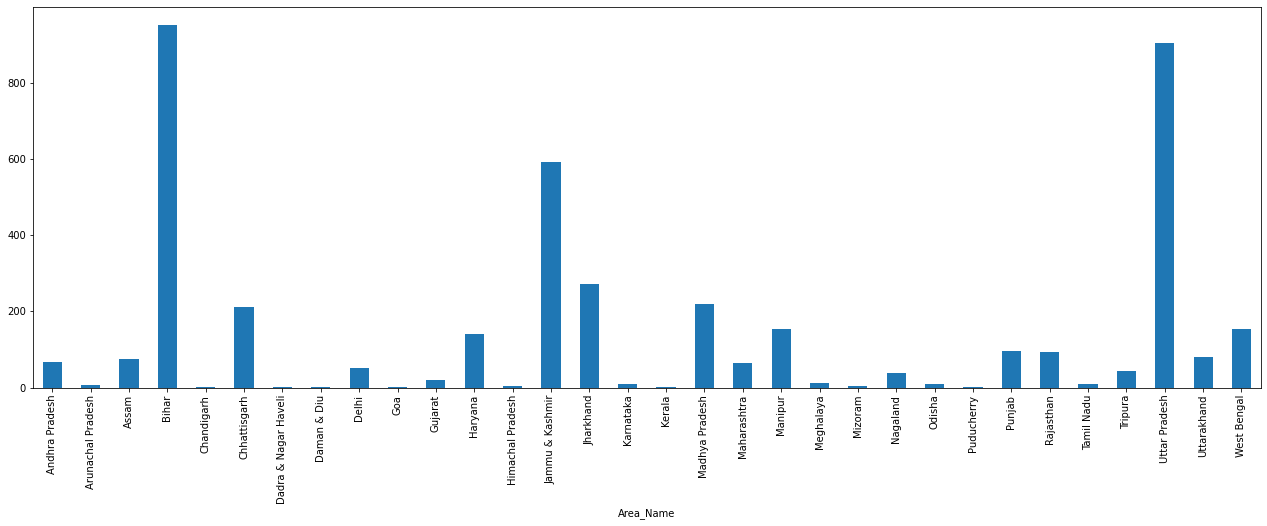

In [26]:
plt.figure(figsize=(22,7)) 
df[~df.index.isin(list(x.index)+list(y.index))].groupby(['Area_Name'])['Total Victims_of_Murder_by_Fire_arms'].mean().plot(kind='bar')

*The following Barplot , gives the overall distribution of crimes using firarms  over the states in India.*

1. Here, ***Jharkand , Chhattisgarh , Jammu & Kashmir, Andhra Pradesh*** has seen significant rise in the firearms incident due  to  rise of Naxalite activities in these areas during 2001 to 2011.

2. https://www.britannica.com/topic/Naxalite ( Refer the link for Naxalite ) 

3. https://en.wikipedia.org/wiki/Insurgency_in_Jammu_and_Kashmir ( Refer This link for terrorism in jammu & kashmir )

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


<AxesSubplot:>

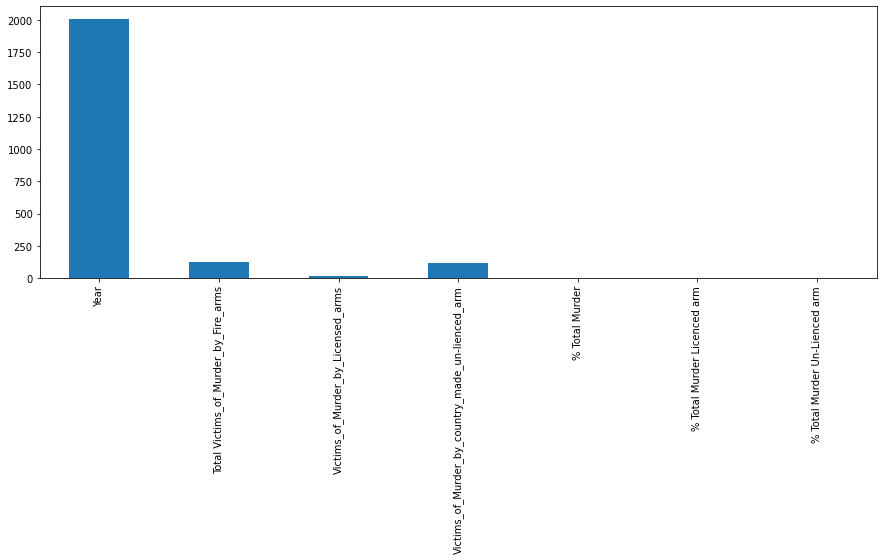

In [27]:
df5=df.copy()
plt.figure(figsize=(15,5)) 
df5.drop(list(x.index)+list(y.index),axis=0).mean().plot(kind='bar')


1. After analyzing the  data from the above code, the following barplot conveys us that, the majority of firearms used in the*** total numbers of murder cases is from  Un-Licenced arm or the country-made arm.***

2. Reason - In india , the citizens are not allowed to carry firearms.

3. https://legislative.gov.in/sites/default/files/A1959-54_0.pdf (Refer  Indian
 arms act of  1959 ) 


<AxesSubplot:xlabel='Area_Name', ylabel='Total Victims_of_Murder_by_Fire_arms'>

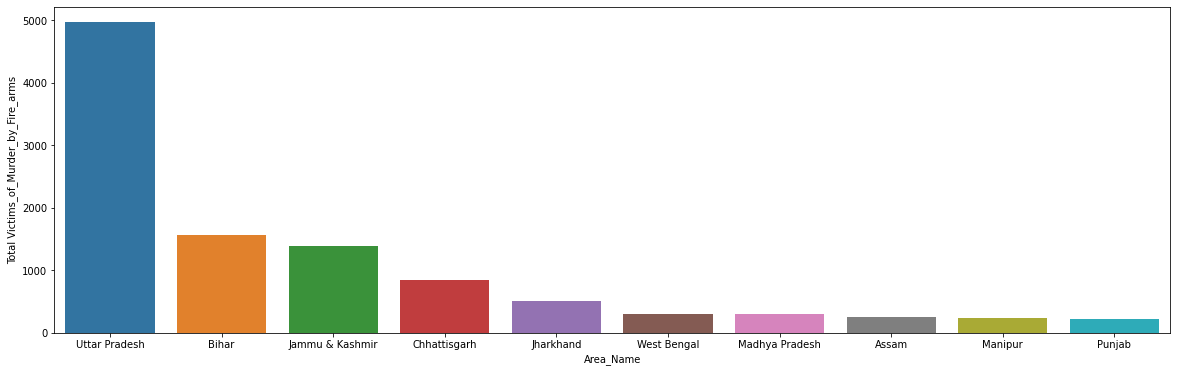

In [28]:
# df.groupby("Area_Name")[['Total Victims_of_Murder_by_Fire_arms']].max().sort_values(['Total Victims_of_Murder_by_Fire_arms'],ascending=False)[:10].plot(kind='bar',figsize=(15,5))
s=df.groupby("Area_Name")[['Total Victims_of_Murder_by_Fire_arms']].max().sort_values(['Total Victims_of_Murder_by_Fire_arms'],ascending=False)[:10]
plt.figure(figsize=(20,6))
sns.barplot(x=s.index,y=s['Total Victims_of_Murder_by_Fire_arms'])

The following Barplot gives the top 10 states included the total incidents of murder using firearms.

1.*** Uttar - Pradesh*** - being the highest at ***1 st position***

2.*** Punjab*** - being at ***10 th position***.

<function matplotlib.pyplot.show(close=None, block=None)>

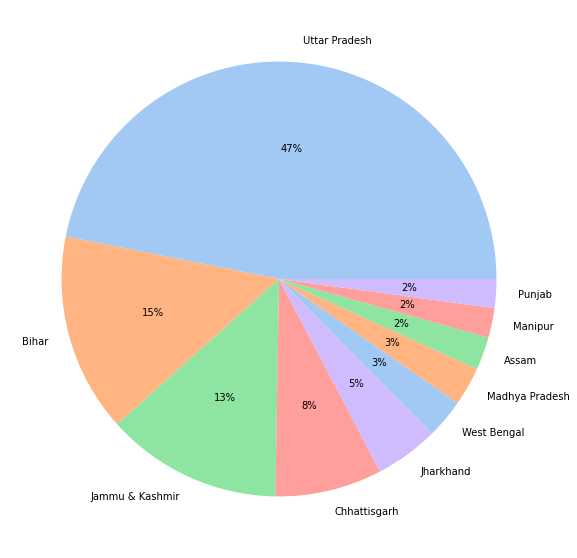

In [29]:
m=df.groupby(['Area_Name'])[['% Total Murder','Total Victims_of_Murder_by_Fire_arms']].max().sort_values(['% Total Murder'],ascending=False)['% Total Murder']
colors = sns.color_palette('pastel')[0:5]
plt.figure(figsize=(30,10))
plt.pie(m.values[:10],labels=m.index[:10] ,colors = colors, autopct='%.0f%%')
plt.show
# m.index , m.values

The following Pie-chart gives the percentage % of top 10 states in *** total murders in country.***

1.*** Uttar-Pradesh - 47 % ***of total murders in India using Firearms.

2.***   Punjab      - 2 % *** of total murders in India using Firearms.


<AxesSubplot:xlabel='Area_Name', ylabel='Victims_of_Murder_by_country_made_un-lienced_arm'>

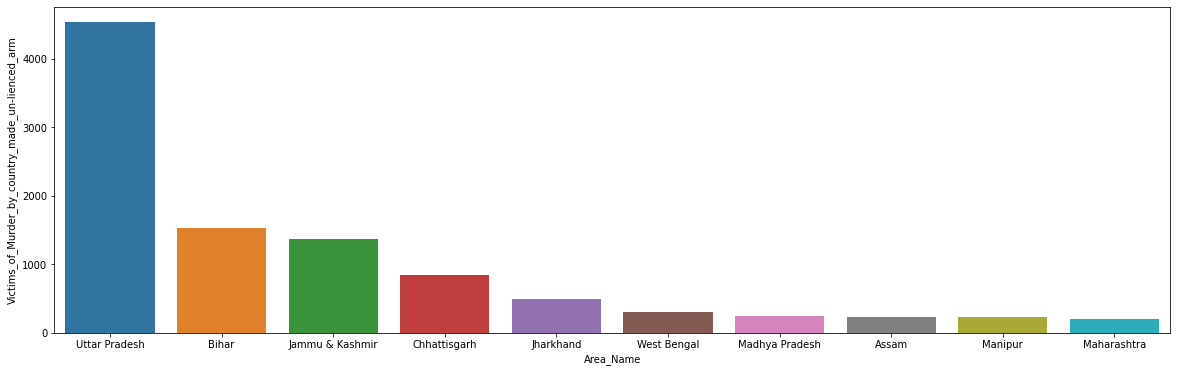

In [30]:
# df.groupby("Area_Name")[['Victims_of_Murder_by_country_made_un-lienced_arm']].max().sort_values(['Victims_of_Murder_by_country_made_un-lienced_arm'],ascending=False)[:10].plot(kind='bar',figsize=(15,5))
o=df.groupby("Area_Name")[['Victims_of_Murder_by_country_made_un-lienced_arm']].max().sort_values(['Victims_of_Murder_by_country_made_un-lienced_arm'],ascending=False)[:10]
plt.figure(figsize=(20,6))
sns.barplot(x=o.index,y=o['Victims_of_Murder_by_country_made_un-lienced_arm'])

The following Barplot gives the percentage % of top 10 states in total murders in country using Un-Lienced arm.

1***.Uttar-Pradesh*** - highest in total murders in India using ***Un-Lienced Firearms.***

2.***Maharashtra*** - lowest in total murders in India using ***Un-Lienced Firearms***.

<function matplotlib.pyplot.show(close=None, block=None)>

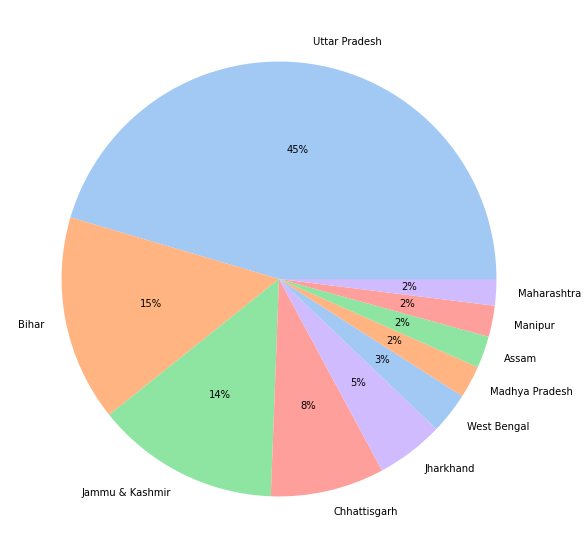

In [31]:
# m=df.groupby(['Area_Name'])[['% Total Murder','Total Victims_of_Murder_by_Fire_arms']].max().sort_values(['% Total Murder'],ascending=False)['% Total Murder'][:10]
c=df.groupby(['Area_Name'])[["% Total Murder Un-Lienced arm",'Victims_of_Murder_by_country_made_un-lienced_arm']].max().sort_values(['% Total Murder Un-Lienced arm'],ascending=False)['% Total Murder Un-Lienced arm'][:10]
colors = sns.color_palette('pastel')[0:5]
plt.figure(figsize=(30,10))
plt.pie(c.values,labels=c.index ,colors = colors, autopct='%.0f%%')
plt.show


The following Pie-chart gives the percentage % of top 10 states in total murders in country using ***Un-Lienced arm.***

1.***Uttar-Pradesh - 45 %*** of total murders in India using Un-Lienced Firearms.

2.***Maharashtra- 2 %*** of total murders in India using Un-Lienced Firearms.

<function matplotlib.pyplot.show(close=None, block=None)>

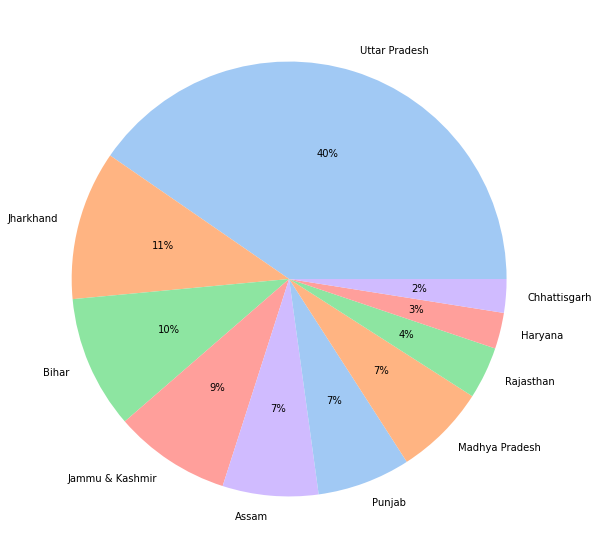

In [32]:
p=df.groupby(["Area_Name"])[['% Total Murder Licenced arm','Victims_of_Murder_by_Licensed_arms']].max().sort_values(['% Total Murder Licenced arm'],ascending=False)['% Total Murder Licenced arm'][:10]
colors = sns.color_palette('pastel')[0:5]
plt.figure(figsize=(30,10))
plt.pie(p.values,labels=p.index ,colors = colors, autopct='%.0f%%')
plt.show



The following Pie-chart gives the percentage % of top 10 states in total murders in country using Un-Lienced arm.

1.***Uttar-Pradesh - 40 %*** of total murders in India using Un-Lienced Firearms.

2.***Chhattisgard - 2 % ***of total murders in India using Un-Lienced Firearms.

**PLOTTING ON MAP OF INDIA USING CHOROPLETH MAP.**

In [33]:
shp_gdf = gpd.read_file('../input/indian-states-shapefiles/Indian_States.shp')
shp_gdf.head()

,st_nm,geometry
0,Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."


*Here, we are using the geometry of the region to shade the states in India with higest murder and lowest murder using firearms.*

In [34]:
df2= shp_gdf.copy()

In [35]:
df2=pd.merge(shp_gdf, m, how='inner', left_on='st_nm', right_on=m.index)

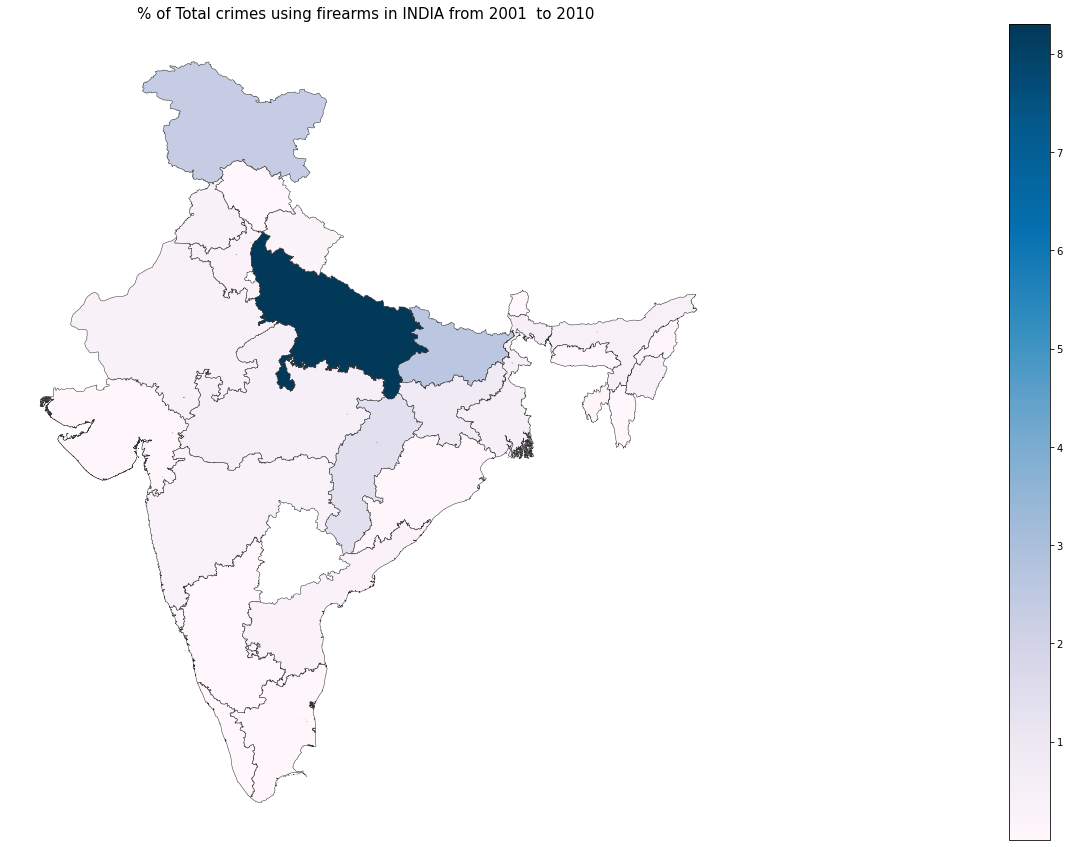

In [36]:
fig, ax = plt.subplots(1, figsize=(100, 15))
ax.axis('off')
ax.set_title('% of Total crimes using firearms in INDIA from 2001  to 2010 ',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = df2.plot(column='% Total Murder', cmap='PuBu', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)

*Here, we are using the geometry of the region to shade the states in India with higest murder and lowest murder using firearms.*

1.***Dark shade - Highest murder*** = UttarPradesh , Bihar , jammu & Kashmir , chattisgarh

2.***Lighest shade - Lowest murde***r - north - eastern states , goa 

3.***Pure White shade - No data Available(*** Telangana state )



***FINAL CONCLUSION FROM GIVEN DATASET USING EDA ***

1. Utter Pradesh has the higest number of murders using gun

2. Jharkand , Chhattisgarh , Jammu & Kashmir, Andhra Pradesh has seen significant rise in the firearms incident due to rise of Naxalite.

3. 2004 had the highest number of crime followed by 2003.

4. 2009 Being the lowest number in crime.

5. the majority of firearms used in the* total numbers of murder cases is from Un-Licenced arm or the country-made arm.*

6. North-Eastern States & Union-Territories of India saw the lowest Gunfires in the dacade. 

***THANK YOU...!!!***

